In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy

from functional import *

In [2]:
DAMP = 0.001

def read_dataset(fname, path):
    f = h5py.File(fname)
    return numpy.array(f[path])

In [3]:
time = read_dataset('HCN_ccpVDZ_prot_8s8p8d_dx_0p001.bin', "RT/TIME")
time_r = read_dataset('HCN_ccpVDZ_prot_8s8p8d_dx_0p001.bin', "RT/TIME")

ux = read_dataset('HCN_ccpVDZ_prot_8s8p8d_dx_0p001.bin', "RT/LEN_ELEC_DIPOLE")[:,0]
uy = read_dataset('HCN_ccpVDZ_prot_8s8p8d_dy_0p001.bin', "RT/LEN_ELEC_DIPOLE")[:,1]
uz = read_dataset('HCN_ccpVDZ_prot_8s8p8d_dz_0p001.bin', "RT/LEN_ELEC_DIPOLE")[:,2]

ux_r = read_dataset('HCN_ccpVDZ_dx_0p001.bin', "RT/LEN_ELEC_DIPOLE")[:,0]
uy_r = read_dataset('HCN_ccpVDZ_dy_0p001.bin', "RT/LEN_ELEC_DIPOLE")[:,1]
uz_r = read_dataset('HCN_ccpVDZ_dz_0p001.bin', "RT/LEN_ELEC_DIPOLE")[:,2]

dt = time[1] - time[0]
dt_r =  time_r[1] - time_r[0]



<ipython-input-2-6ad5c3050423>:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(fname)


In [5]:
ux_r

array([ 0.00000000e+00,  5.98669241e-06,  1.94926788e-05, ...,
       -6.78905713e-06, -6.96207238e-06, -7.12585726e-06])

In [13]:
signals = [ux, uy, uz]
signals_r  = [ux_r , uy_r , uz_r]
# Fourier transformed spectra
spects = []
freq = None
for s in signals:
    s -= s[0]
    s *= np.exp(-DAMP*time)
    #w, f = fourier_tx(s, dt, 0)
    w, f = pade_tx(s, dt, (0,5),res=10000)
    freq = w
    spects.append(f)
total = sum([f.imag for f in spects]) / 3
total *= freq

spects_r = []
freq_r = None
for s in signals_r:
    s -= s[0]
    s *= np.exp(-DAMP*time_r)
    #w, f = fourier_tx(s, dt, 0)
    w, f = pade_tx(s, dt_r, (0,5),res=10000)
    freq_r = w
    spects_r.append(f)
total_r = sum([f.imag for f in spects_r]) / 3
total_r *= freq_r

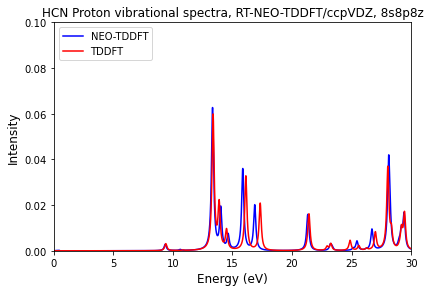

In [14]:
# Plotting
plt.plot(freq*27.2114, total, c='b',label="NEO-TDDFT")
plt.plot(freq_r*27.2114, total_r, c='r', label='TDDFT')
plt.xlim(0,30)
plt.ylim(0,0.1)
plt.ylabel("Intensity", fontsize=12)
plt.xlabel("Energy (eV)", fontsize=12)
plt.tight_layout()
plt.legend(loc="upper left")
plt.title("HCN Proton vibrational spectra, RT-NEO-TDDFT/ccpVDZ, 8s8p8z")
#plt.savefig("HCN_single_proton.pdf")
plt.show()